In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# Generate Sample Sales Data
def generate_sales_data():
    np.random.seed(42)
    dates = pd.date_range(start='2023-01-01', periods=60, freq='D')  # Adjusted for 60 rows
    products = ['Product A', 'Product B', 'Product C', 'Product D']
    data = {
        'Date': np.tile(dates, len(products)),
        'Product': np.repeat(products, len(dates)),
        'Revenue': np.random.randint(100, 1000, len(dates) * len(products)),
        'Units_Sold': np.random.randint(10, 100, len(dates) * len(products))
    }
    return pd.DataFrame(data)



In [23]:
# Load Data
df = generate_sales_data()


In [24]:
# Convert Date Column to DateTime Format
df['Date'] = pd.to_datetime(df['Date'])


In [25]:
# Extract Features for Prediction
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [26]:
# Print DataFrame Shape
print(f"DataFrame Shape: Rows={df.shape[0]}, Columns={df.shape[1]}")


DataFrame Shape: Rows=240, Columns=7


In [27]:
# Selecting Features and Target Variable
X = df[['Day', 'Month', 'Year', 'Units_Sold']]
y = df['Revenue']

In [28]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make Predictions
y_pred = model.predict(X_test)


In [31]:
# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 235.4465055809958
Mean Squared Error (MSE): 69633.7108978173
Root Mean Squared Error (RMSE): 263.8820018451757


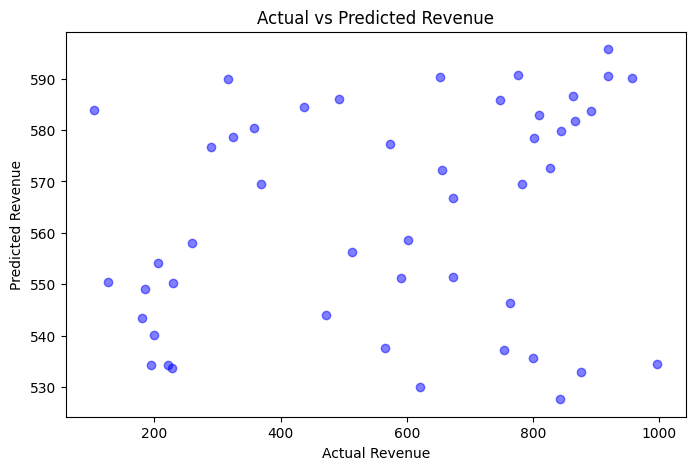

In [32]:
# Plot Actual vs Predicted Revenue
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

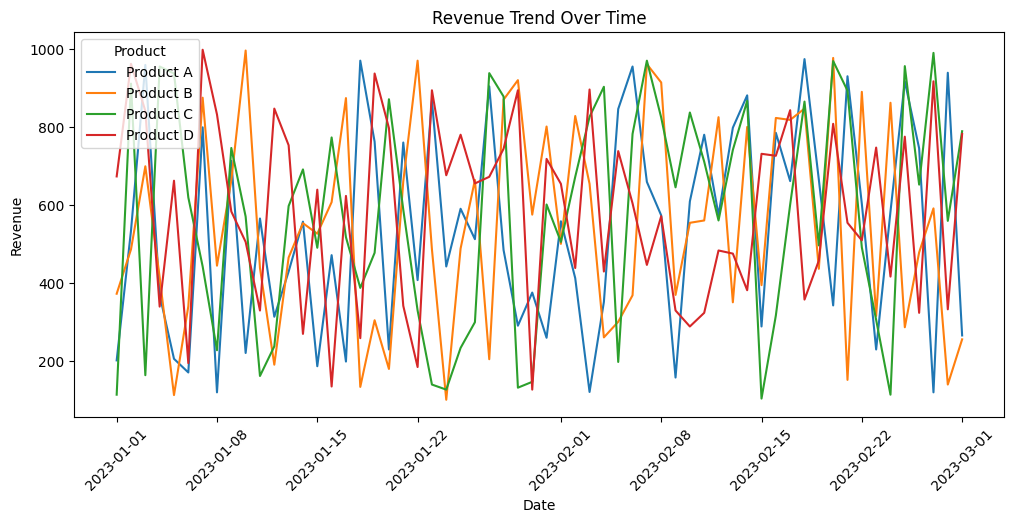

In [33]:
# Plot Revenue Trend Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Date', y='Revenue', hue='Product')
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.show()

<ipython-input-34-dab6e44fefaf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Product')['Revenue'].sum().reset_index(), x='Product', y='Revenue', palette='coolwarm')


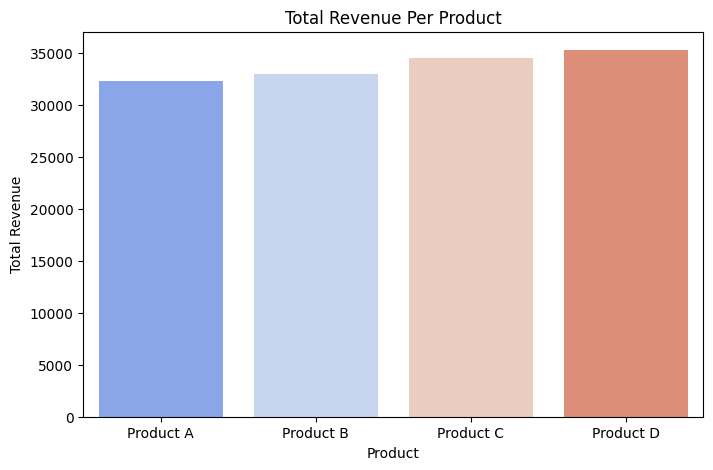

In [34]:
# Plot Total Revenue Per Product
plt.figure(figsize=(8, 5))
sns.barplot(data=df.groupby('Product')['Revenue'].sum().reset_index(), x='Product', y='Revenue', palette='coolwarm')
plt.title('Total Revenue Per Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()

<ipython-input-35-a49accc4d755>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Revenue', palette='viridis')


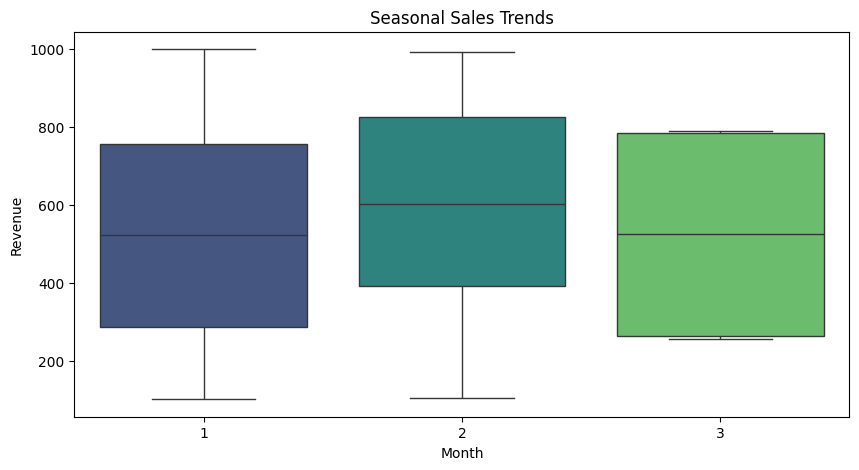

In [35]:
# Plot Seasonal Sales Trends
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Month', y='Revenue', palette='viridis')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [36]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                      Date    Revenue  Units_Sold         Day       Month  \
count                  240  240.00000  240.000000  240.000000  240.000000   
mean   2023-01-30 12:00:00  562.30000   52.233333   15.050000    1.500000   
min    2023-01-01 00:00:00  101.00000   10.000000    1.000000    1.000000   
25%    2023-01-15 18:00:00  338.25000   30.750000    7.750000    1.000000   
50%    2023-01-30 12:00:00  571.50000   52.500000   15.000000    1.000000   
75%    2023-02-14 06:00:00  798.25000   71.000000   22.250000    2.000000   
max    2023-03-01 00:00:00  999.00000   99.000000   31.000000    3.000000   
std                    NaN  261.98004   25.085705    8.717654    0.533403   

         Year  
count   240.0  
mean   2023.0  
min    2023.0  
25%    2023.0  
50%    2023.0  
75%    2023.0  
max    2023.0  
std       0.0  
